In [34]:
# Importings base libraries
import os;
import pandas as pd; 
import librosa;
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt


%matplotlib inline


In [35]:
# Input Variables and Setup
training_data_path   = os.path.join(".","dados","TREINAMENTO")
validation_data_path = os.path.join(".","dados","VALIDACAO")


In [69]:
def get_audio_and_sampling_rate_from_df(df, row_index, asNumpyArray = True ):
    data, sampling_rate, label = get_data_sample_rate_and_legend_from_df(df, row_index, asNumpyArray)
    return(data, sampling_rate)

def get_data_sampling_rate_and_legend_from_df(df, row_index, asNumpyArray = True):
    data = df.iloc[ row_index , df.columns.get_loc(0): ].astype('float64')
    if(asNumpyArray):
        data = data.values
    sample_rate = df.loc[: , "sr"].iloc[row_index]
    label = df.loc[ : , 'label'].iloc[row_index]
    return(data, sample_rate, label)
    
def show_data(df, row):
    # Retrieve information from DF
    audio_data, sampling_rate, label = get_data_sample_rate_and_legend_from_df(df, row)
    
    # Print some stats and display the sound
    print(f"{label}({librosa.get_duration(audio_data, sr=sampling_rate)} sec)")
    ipd.display(ipd.Audio(audio_data, rate=sampling_rate))
    
    print("\n")
    # Make plots
    X = librosa.stft(audio_data)
    Xdb = librosa.amplitude_to_db(abs(X))

    plt.figure(figsize=(8, 16), dpi= 80, facecolor='w', edgecolor='k')

    plt.subplot(3, 1, 1)
    plt.title("Wave")
    librosa.display.waveplot(audio_data, sr=sampling_rate, x_axis="time")

    plt.subplot(3, 1, 2)
    plt.title("MEL")
    librosa.display.specshow(Xdb, sr=sampling_rate, x_axis="time", y_axis="mel")

    plt.subplot(3, 1, 3)
    plt.title("HZ")
    librosa.display.specshow(Xdb, sr=sampling_rate, x_axis="time", y_axis="hz")

    print("Audio")
    ipd.Audio(audio_data, rate = sampling_rate)

In [62]:
f = get_files_from(training_data_path)

In [63]:
example = f[1]

wave = load_wav_file(example)
sr = get_sampling_rate(example)
labels = get_labels(example)

df = join_onda_with_label(wave, labels, sr)


In [64]:
data, sampling_rate = get_audio_and_sr_from_df(df, 1)

In [50]:
data

0       -0.001022
1       -0.001648
2       -0.000946
3       -0.001266
4        0.000748
           ...   
88195   -0.001953
88196   -0.001953
88197   -0.001953
88198   -0.001953
88199   -0.001953
Name: 1, Length: 88200, dtype: float64

In [66]:
librosa.get_duration(data, sr=sampling_rate)

2.0

In [67]:
ipd.Audio(data, rate=sampling_rate)

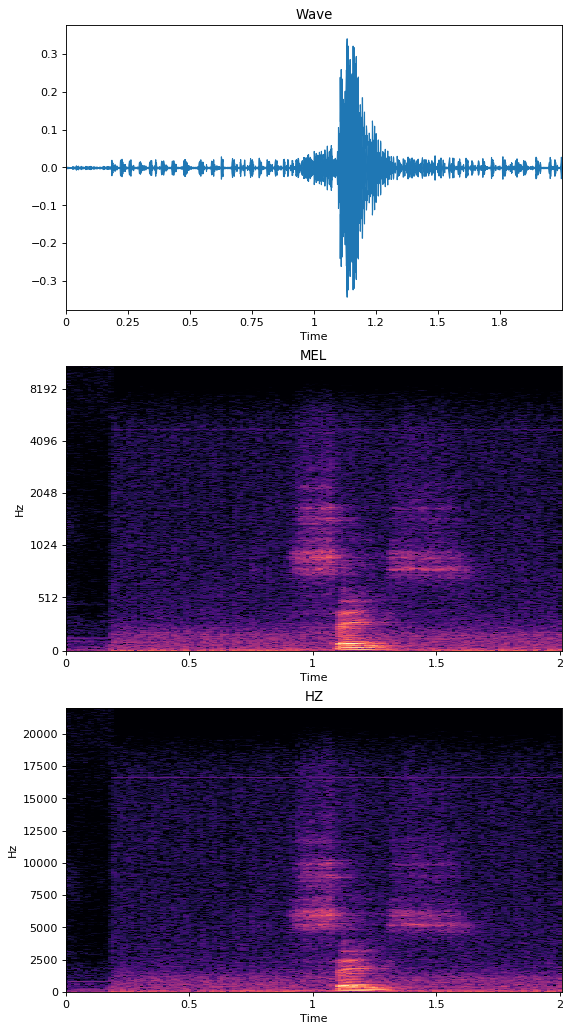

In [68]:
X = librosa.stft(data)
Xdb = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(8, 16), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(3, 1, 1)
plt.title("Wave")
librosa.display.waveplot(data, sr=sampling_rate, x_axis="time")

plt.subplot(3, 1, 2)
plt.title("MEL")
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis="time", y_axis="mel")

plt.subplot(3, 1, 3)
plt.title("HZ")
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis="time", y_axis="hz")
